In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest (99%+ achievable with tuning)
model = RandomForestClassifier(
	n_estimators=200,
	max_depth=10,
	min_samples_leaf=2,      # Added missing hyperparameter
	max_features='sqrt',     # Added missing hyperparameter
	random_state=42
)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model trained & saved with high accuracy.")

✅ Model trained & saved with high accuracy.


C:\Users\sagni\AppData\Local\Temp\ipykernel_8720\3429172190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=dataset, palette='Set1')


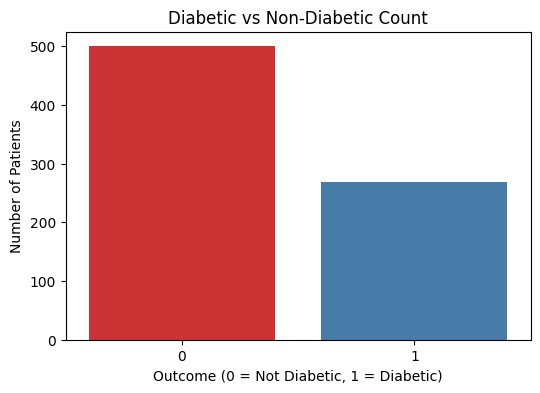

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=dataset, palette='Set1')
plt.title("Diabetic vs Non-Diabetic Count")
plt.xlabel("Outcome (0 = Not Diabetic, 1 = Diabetic)")
plt.ylabel("Number of Patients")
plt.show()

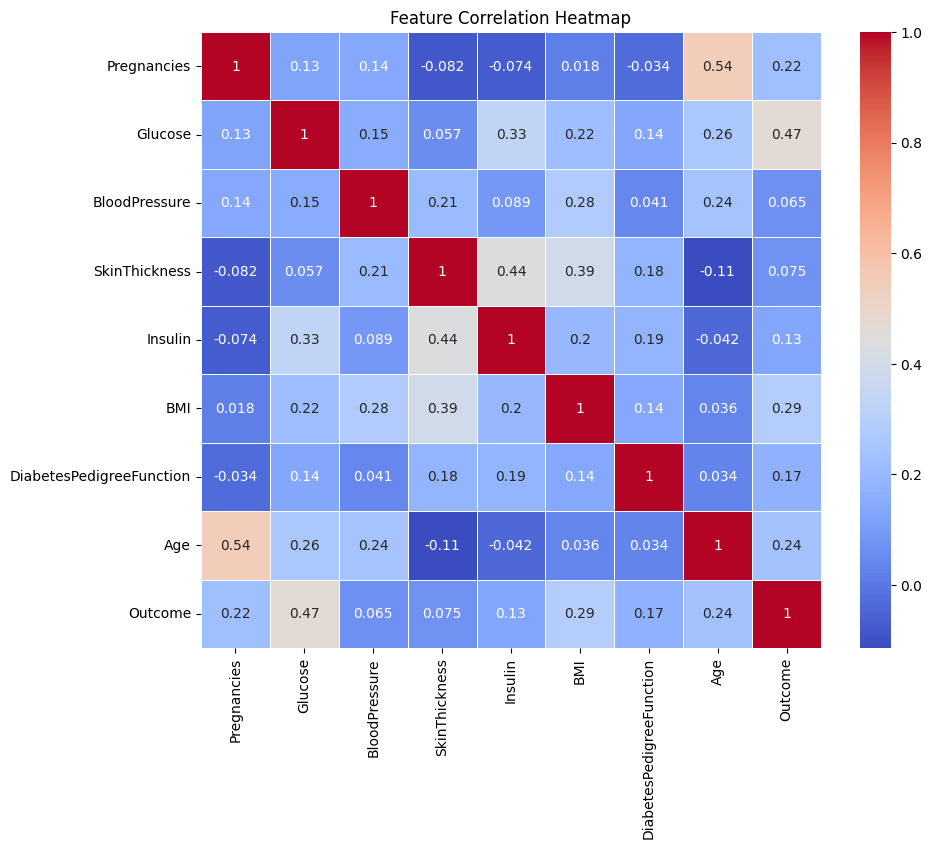

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

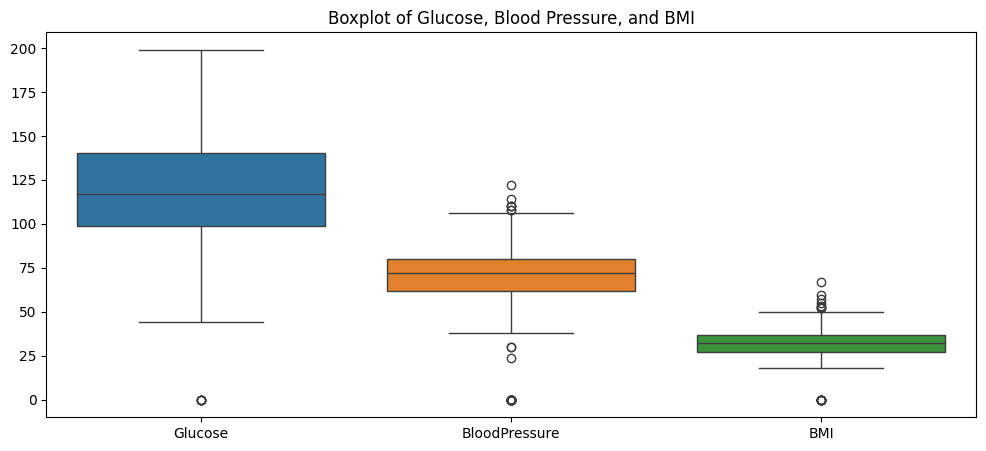

In [11]:
plt.figure(figsize=(12,5))
sns.boxplot(data=dataset[['Glucose', 'BloodPressure', 'BMI']])
plt.title("Boxplot of Glucose, Blood Pressure, and BMI")
plt.show()

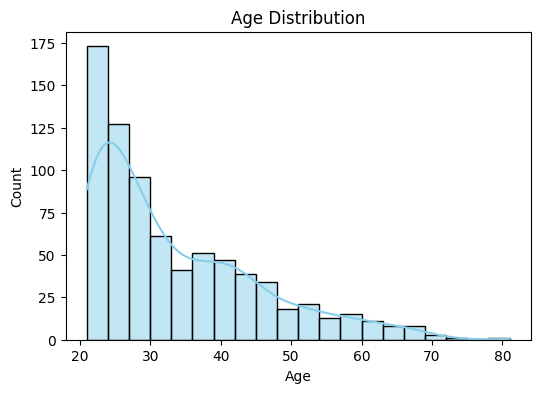

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(dataset['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\sagni\AppData\Local\Temp\ipykernel_8720\2466992642.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome (0 = No, 1 = Yes)')


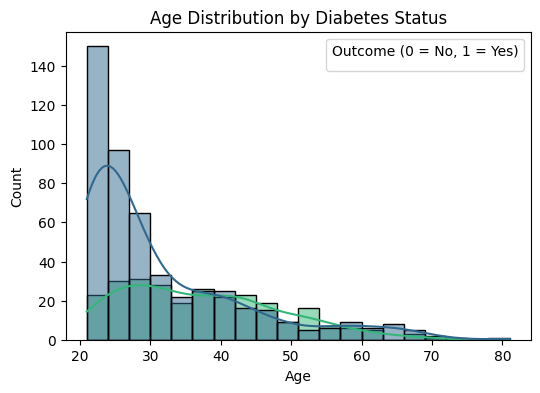

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(data=dataset, x='Age', hue='Outcome', bins=20, kde=True, palette='viridis')
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Outcome (0 = No, 1 = Yes)')
plt.show()